In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline     
import warnings 
warnings.filterwarnings('ignore')

c:\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#   Q1 →→→ANS

In [2]:
df = pd.read_csv(r"Cutlets.csv")
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


- Ho : µ1  = µ2 There is no significant difference in the units.
- Ha : µ1 != µ2 There is significant difference in the units


In [3]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [5]:
df[df.duplicated()].shape

(0, 2)

Text(0.5, 1.0, 'Unit B')

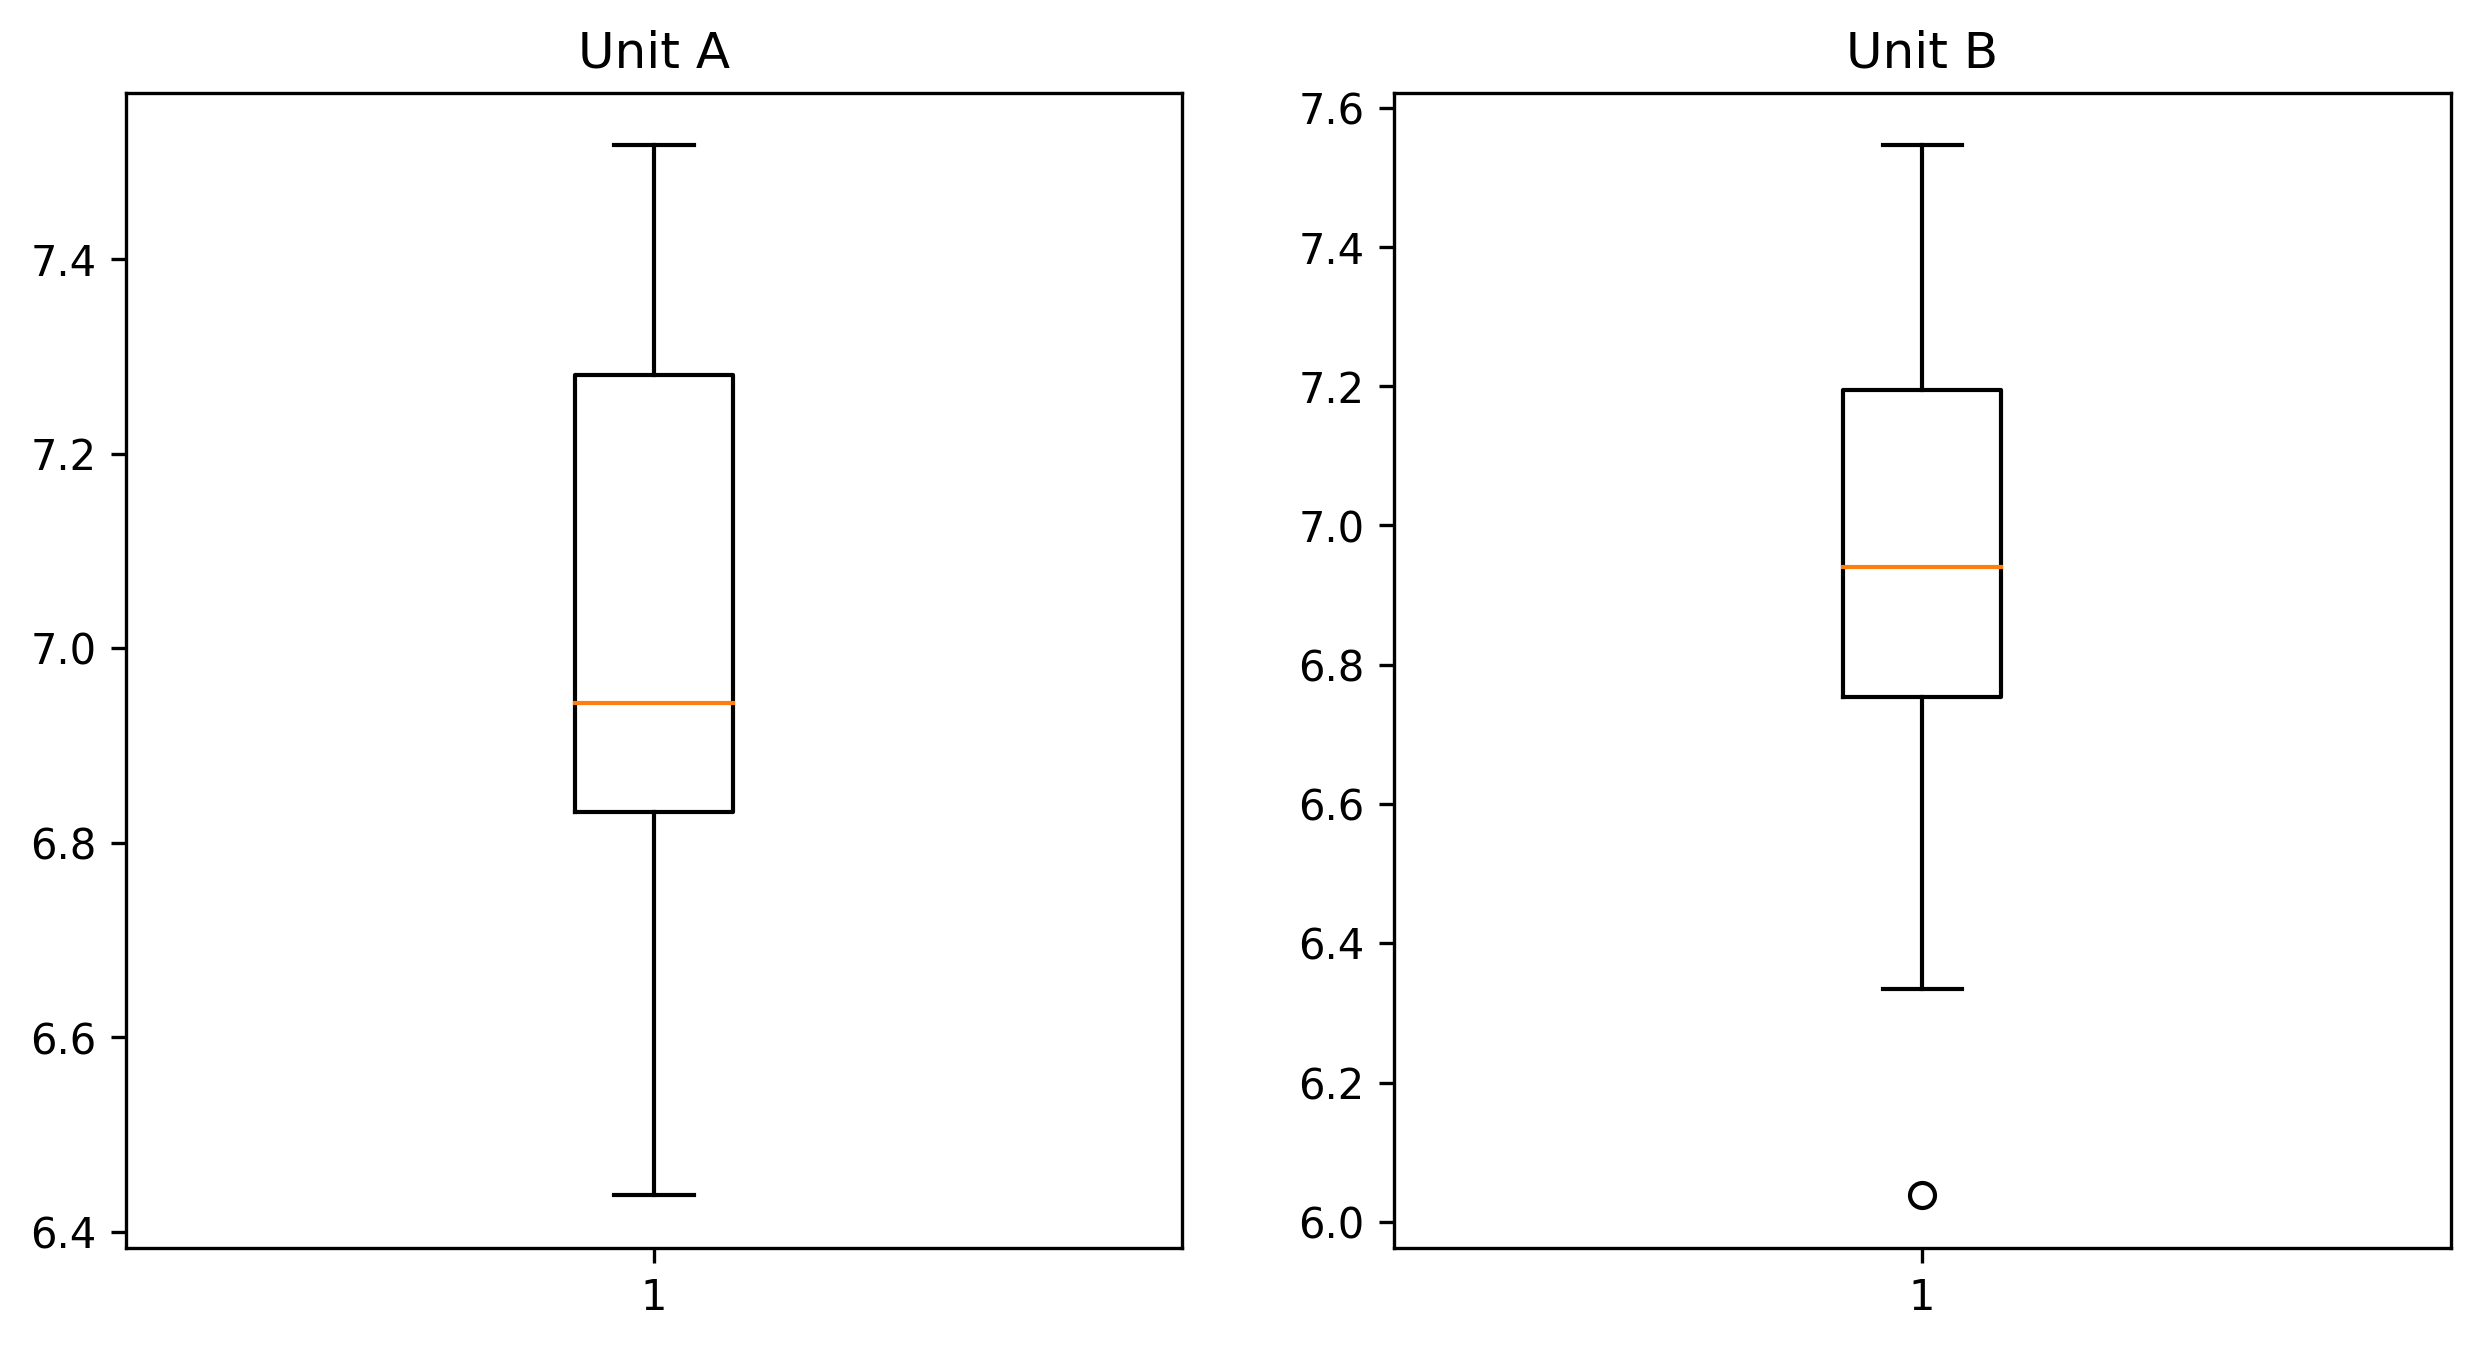

In [6]:
plt.subplot(1 , 2 , 1)
plt.boxplot(df['Unit A'])
plt.title("Unit A")


plt.subplot(1,2,2)
plt.boxplot(df['Unit B'])
plt.title("Unit B")

In [7]:
s,p = stats.ttest_ind(df['Unit A'] , df['Unit B'])
s,p

(0.7228688704678063, 0.47223947245995)

In [8]:
α = 0.05

if p < α:
    print("Reject null hypothesis : There is significant difference in the diameter of the cutlet between two units.")
else:
    print("Fail to reject null hypothesis : On both units,the diameter of the cutlet is the same.")
        

Fail to reject null hypothesis : On both units,the diameter of the cutlet is the same.


# Q2 →→→ANS

- Ho : µ1=µ2=µ3=µ4 (There is no significant difference in the average TAT among the laboratories)
    
- Ha : µ1!=µ2!=µ3!=µ4 (There is significant difference in the average TAT among the laboratories)

In [9]:
lab = pd.read_csv(r"LabTAT.csv")
lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [10]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [11]:
lab.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [12]:
lab[lab.duplicated()].shape

(0, 4)

In [13]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


Text(0, 0.5, 'TAT time')

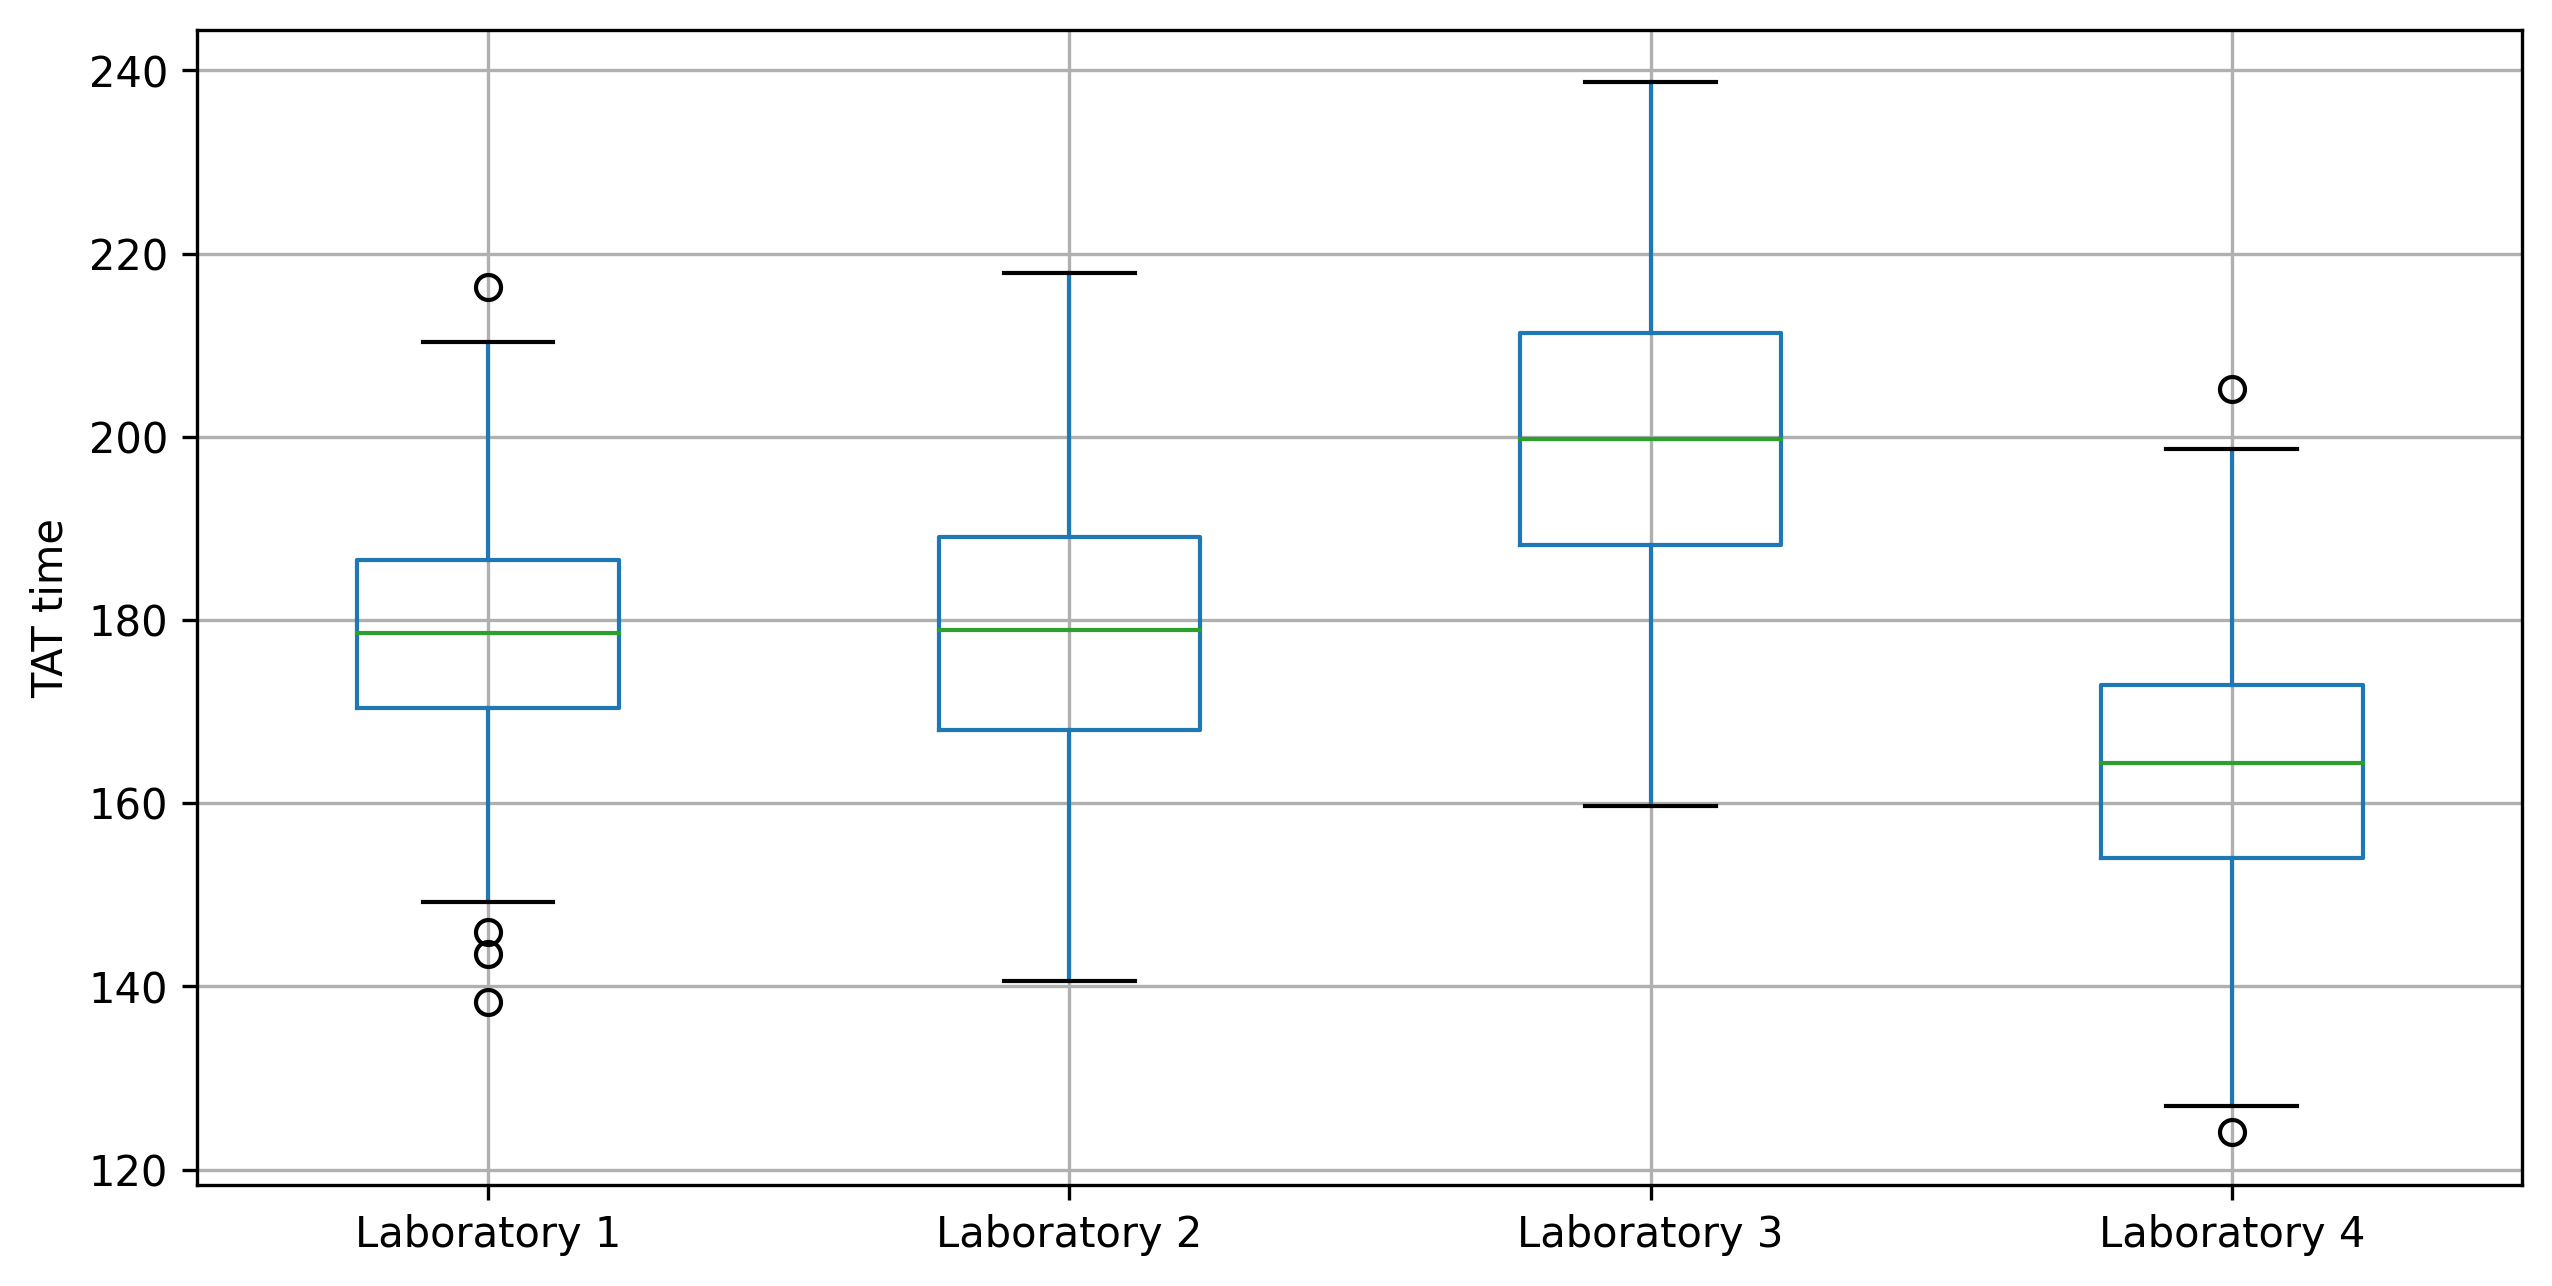

In [14]:
lab.boxplot()
plt.ylabel("TAT time")

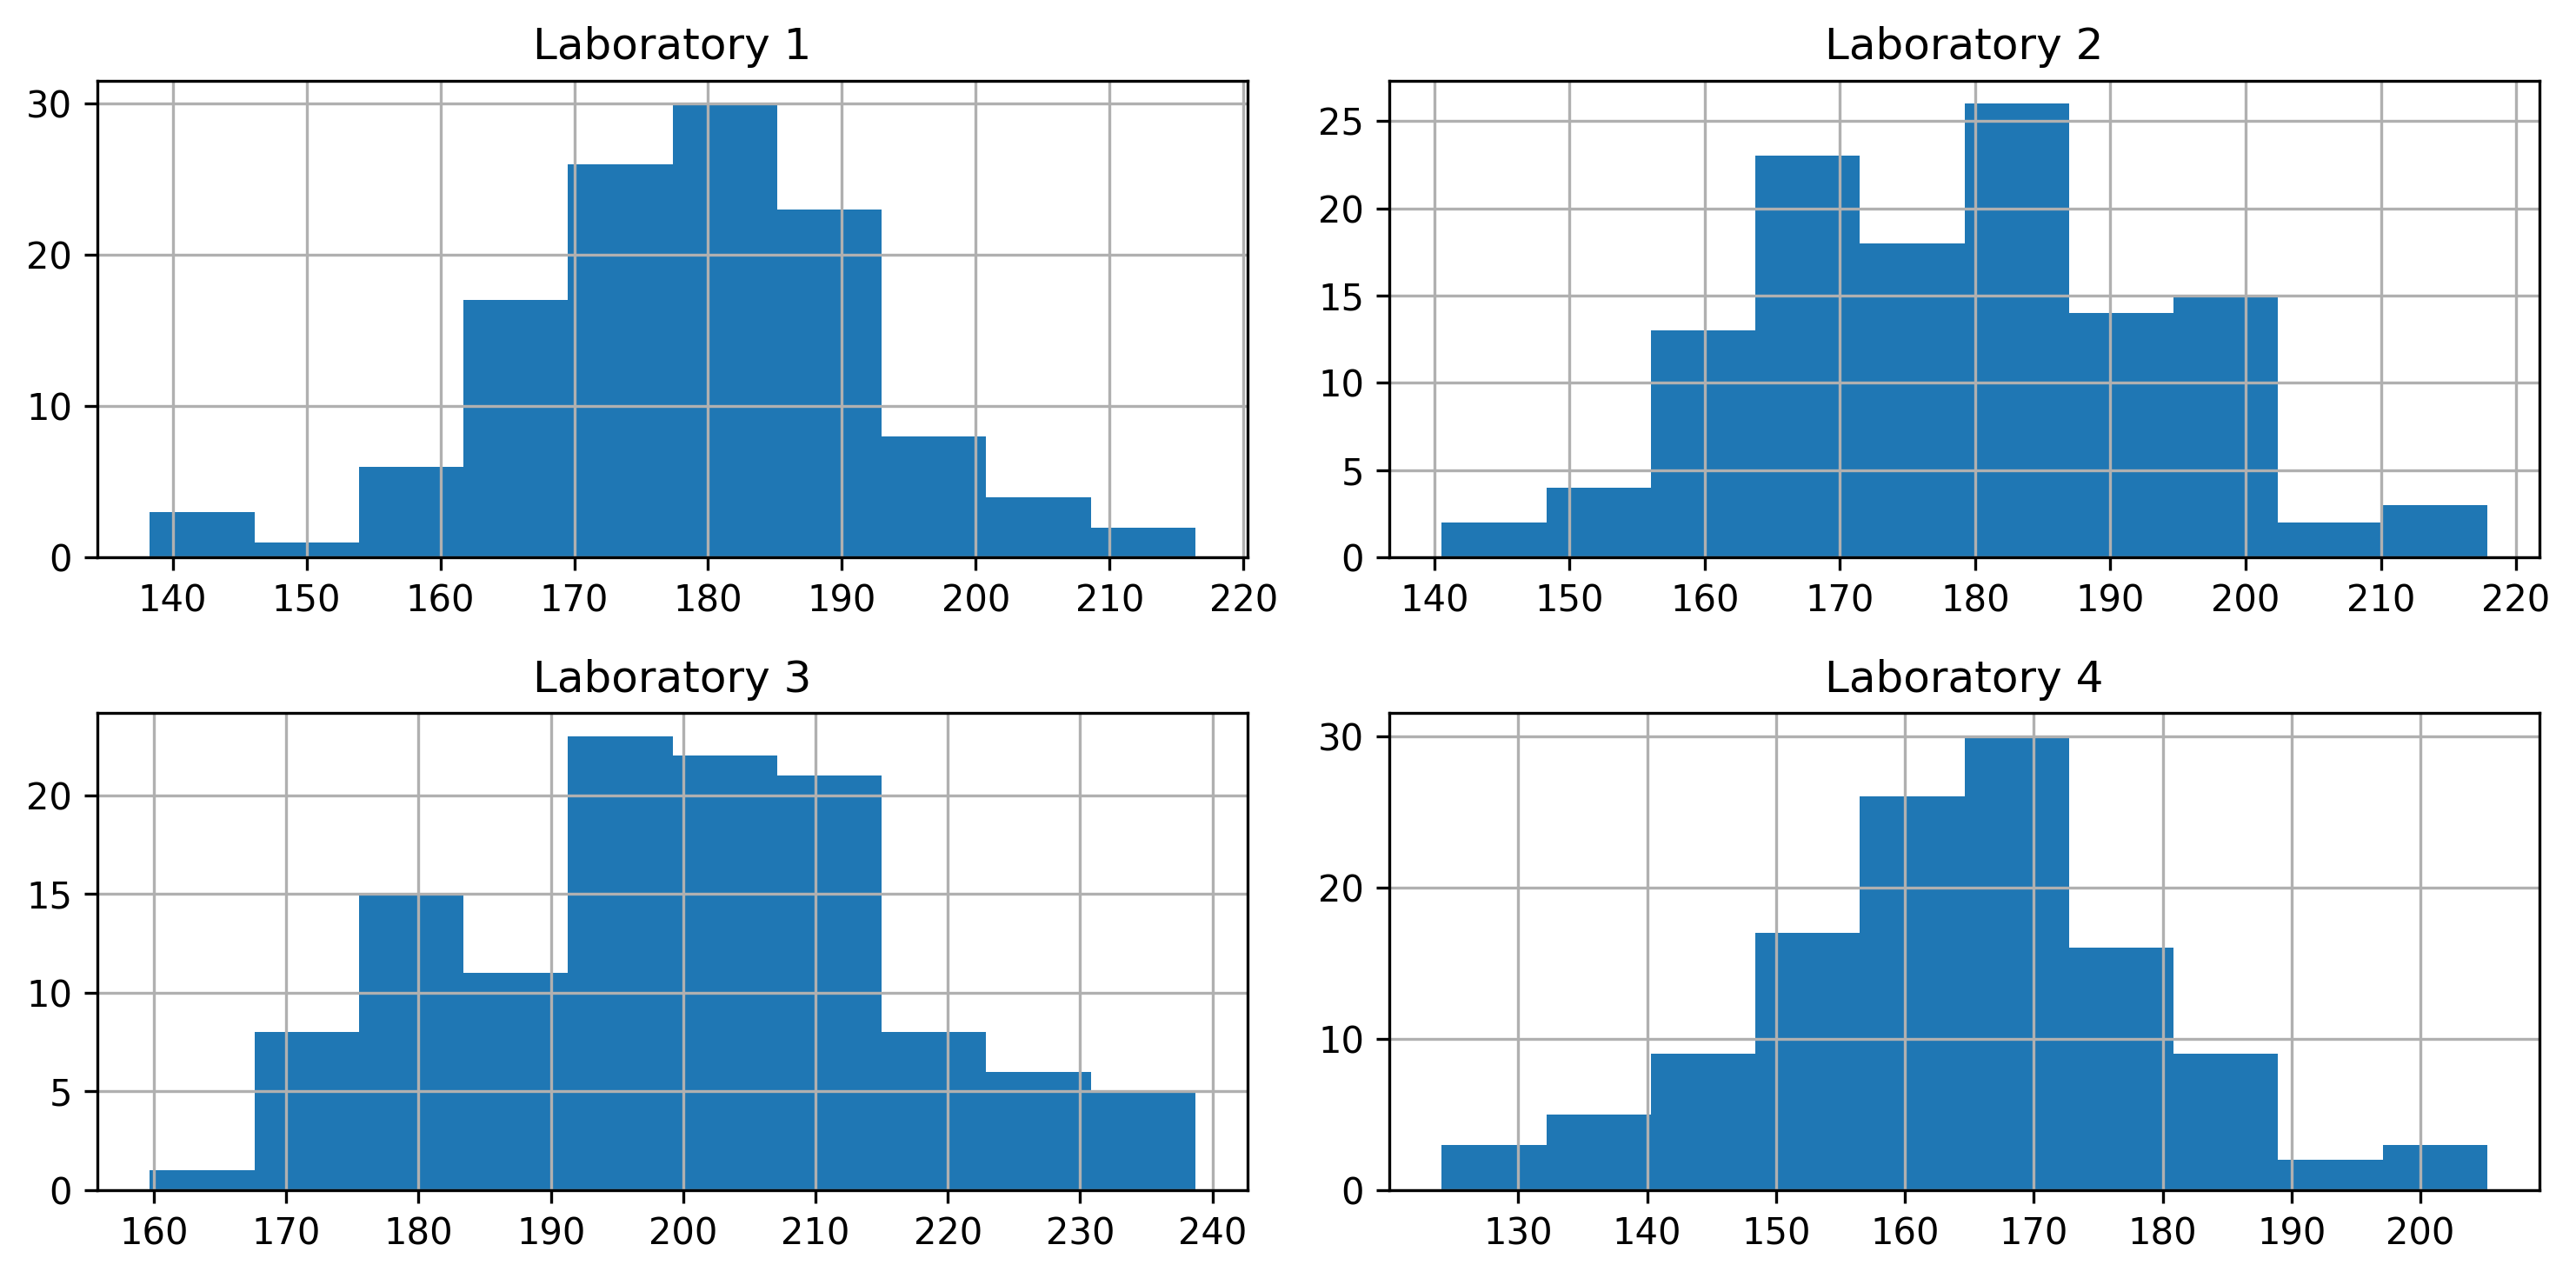

In [15]:
lab.hist()
plt.tight_layout()

In [16]:
f , p = stats.f_oneway(lab['Laboratory 1'] , lab['Laboratory 2'] , lab['Laboratory 3'] , lab['Laboratory 4'])
f,p

(118.70421654401437, 2.1156708949992414e-57)

In [17]:
p

2.1156708949992414e-57

In [18]:
α = 0.05

if p < α:
    print("Reject null hypothesis :There is significant difference in the average TAT among the laboratories.")
else:
    print("Fail to reject null hypothesis : There is no significant fiiferece in the average TAT among the laboratories.")

Reject null hypothesis :There is significant difference in the average TAT among the laboratories.


# Q3 →→→ANS

In [19]:
from scipy.stats import chi2_contingency

In [20]:
buyer_table = pd.DataFrame({
    'Males' : [50 ,142 ,131,70],
    'Females': [550 , 351,480,350]
 },index =['East','West','North','SOuth'])

In [21]:
buyer_table

,Males,Females
East,50,550
West,142,351
North,131,480
SOuth,70,350


In [22]:
chi2, p_value, _, _ = chi2_contingency(df)
p

2.1156708949992414e-57

In [23]:
α = 0.05
if p < α:
    print("Reject null hypothesis : There is a significant difference in male-female buyer ratios across regions. ")
else:
    print('Fail to reject null hypothesis : "There is no significant difference in male-female buyer ratios across regions."')

Reject null hypothesis : There is a significant difference in male-female buyer ratios across regions. 


# Q4 →→→ANS

- Ho : There is no significant difference in the defective percentage among the four centers.
- Ha : There is significant difference in the defective percentage among the four centers.

In [24]:
df = pd.read_csv(r"Costomer+OrderForm.csv")
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [25]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [26]:
df.isna().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [27]:
for column in df.columns:
    print(f"The value count for :{df[column].value_counts()}\n")

The value count for :Error Free    271
Defective      29
Name: Phillippines, dtype: int64

The value count for :Error Free    267
Defective      33
Name: Indonesia, dtype: int64

The value count for :Error Free    269
Defective      31
Name: Malta, dtype: int64

The value count for :Error Free    280
Defective      20
Name: India, dtype: int64



In [28]:
obs = np.array([[271,267,269,280], [29,33,31,20]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [29]:
chi2 , p , dof , exp = chi2_contingency(obs)
p

0.2771020991233135

In [30]:
α = 0.05

if p < α:
    print("Reject null hypothesis : There is significant difference in the defective percentage among the four centers.")
else:
    print("Fail to reject null hypothesis : There is no significant difference in the defective percentage among the four centers.")

Fail to reject null hypothesis : There is no significant difference in the defective percentage among the four centers.
